# Alireza Salehi Hossein Abadi(9729833) -Parctical Exercise of Machine Learning - HW04

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.patches as mpatches 
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
import numpy as np
import pandas 

# سؤال اول: 

## خواندن فایل csv  

In [2]:
# Read CSV file related to the Q1
columns_names_Q1 = ['Oral Exam','Written Exam','Class']
raw_data_Q1 = pandas.read_csv('Q1.csv', header=None, names = columns_names_Q1)

## الف)دسته بندی به دو دسته train و test   

In [3]:
X_Q1 = raw_data_Q1[['Oral Exam','Written Exam']]
Y_Q1 = raw_data_Q1[['Class']]

X_train_Q1, X_test_Q1, Y_train_Q1, Y_test_Q1 = train_test_split(X_Q1, Y_Q1, test_size = 0.30)

### نمایش داده های دسته train 

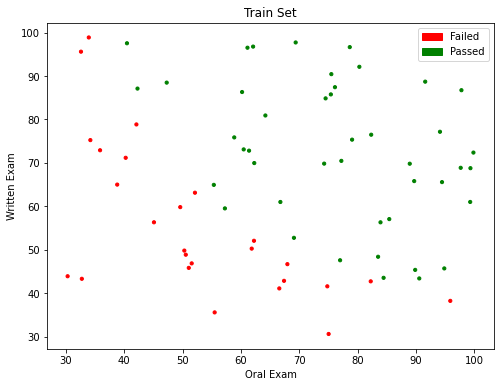

In [4]:
plt.figure(figsize=(8, 6))
color = np.array(['r', 'g'])
plt.scatter(X_train_Q1['Oral Exam'],
            X_train_Q1['Written Exam'],
            s = 10,
            c = color[Y_train_Q1['Class']])
plt.xlabel('Oral Exam')
plt.ylabel('Written Exam')
plt.title('Train Set')
red_patch = mpatches.Patch(color='red', label='Failed')
green_patch = mpatches.Patch(color='green', label='Passed')
plt.legend(handles=[red_patch, green_patch])
plt.show()

### نمایش داده های دسته test 

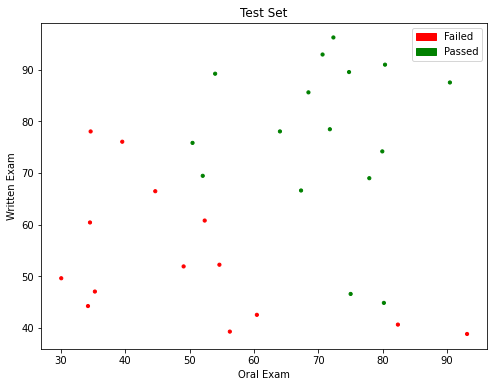

In [5]:
plt.figure(figsize=(8, 6))
color = np.array(['r', 'g'])
plt.scatter(X_test_Q1['Oral Exam'],
            X_test_Q1['Written Exam'],
            s = 10,
            c = color[Y_test_Q1['Class']])
plt.xlabel('Oral Exam')
plt.ylabel('Written Exam')
plt.title('Test Set')
red_patch = mpatches.Patch(color='red', label='Failed')
green_patch = mpatches.Patch(color='green', label='Passed')
plt.legend(handles=[red_patch, green_patch])
plt.show()

## ج)طبقه بندی رگرسیون لجیستیک و نمایش دقت بر روی داده های آموزشی (train set) و داده های تست(test set) 

In [6]:
model_Q1 = LogisticRegression()
model_Q1.fit(X_train_Q1, Y_train_Q1.values.ravel())
Y_train_predict_Q1 = model_Q1.predict(X_train_Q1)
print('Accuracy on Train Set: {:.2f}%'.format(accuracy_score(Y_train_Q1,Y_train_predict_Q1)*100))

X_test_predict_Q1 = model_Q1.predict(X_test_Q1)
Y_test_predict_Q1 = pandas.DataFrame(X_test_predict_Q1, columns=['Class'], index = Y_test_Q1.index)
print('Accuracy on Test  Set: {:.2f}%'.format(accuracy_score(Y_test_Q1, Y_test_predict_Q1)*100))

Accuracy on Train Set: 90.00%
Accuracy on Test  Set: 86.67%


## د) رسم مرز تصمیم 

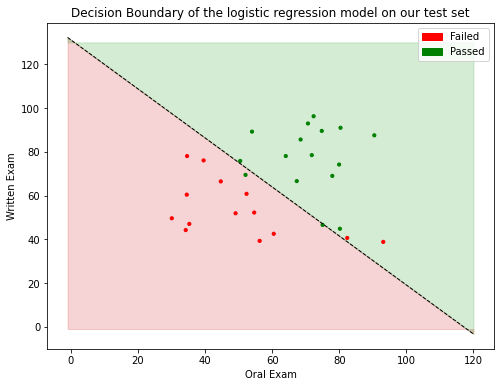

In [7]:
# Retrieve the model parameters.
b = model_Q1.intercept_[0]
w1, w2 = model_Q1.coef_.T

# Calculate the intercept and gradient of the decision boundary
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary
X_min_Q1, X_max_Q1 = -1, 120
Y_min_Q1, Y_max_Q1 = -1, 130
X_d_Q1 = np.array([X_min_Q1, X_max_Q1])
Y_d_Q1 = m*X_d_Q1 + c

color = np.array(['r', 'g'])
plt.figure(figsize=(8, 6))

plt.plot(X_d_Q1, Y_d_Q1, 'k', lw=1, ls='--')
plt.fill_between(X_d_Q1, Y_d_Q1, Y_min_Q1, color='tab:red', alpha=0.2)
plt.fill_between(X_d_Q1, Y_d_Q1, Y_max_Q1, color='tab:green', alpha=0.2)

plt.scatter(X_test_Q1['Oral Exam'],
            X_test_Q1['Written Exam'],
            s = 10,
            c = color[Y_test_Q1['Class']])

plt.xlabel('Oral Exam')
plt.ylabel('Written Exam')
plt.title('Decision Boundary of the logistic regression model on our test set')
red_patch = mpatches.Patch(color='red', label='Failed')
green_patch = mpatches.Patch(color='green', label='Passed')
plt.legend(handles=[red_patch, green_patch])

plt.show()

# سؤال دوم 

## خواندن فایل csv

In [8]:
# Read CSV file related to the Q2
columns_names_Q2 = ['Examination 1','Examination 2','Class']
raw_data_Q2 = pandas.read_csv('Q2.csv', header=None, names = columns_names_Q2)

## الف)دسته بندی به دو دسته train و test   

In [9]:
X_Q2 = raw_data_Q2[['Examination 1','Examination 2']]
Y_Q2 = raw_data_Q2[['Class']]

X_train_Q2, X_test_Q2, Y_train_Q2, Y_test_Q2 = train_test_split(X_Q2, Y_Q2, test_size = 0.30)

### نمایش داده های دسته train 

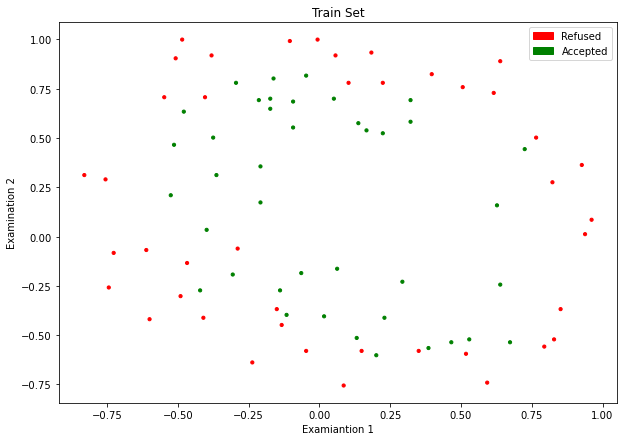

In [10]:
plt.figure(figsize=(10, 7))
color = np.array(['r', 'g'])
plt.scatter(X_train_Q2['Examination 1'],
            X_train_Q2['Examination 2'],
            s = 10,
            c = color[Y_train_Q2['Class']])
plt.xlabel('Examiantion 1')
plt.ylabel('Examination 2')
plt.title('Train Set')
red_patch = mpatches.Patch(color='red', label='Refused')
green_patch = mpatches.Patch(color='green', label='Accepted')
plt.legend(handles=[red_patch, green_patch])
plt.show()

### نمایش داده های دسته test 

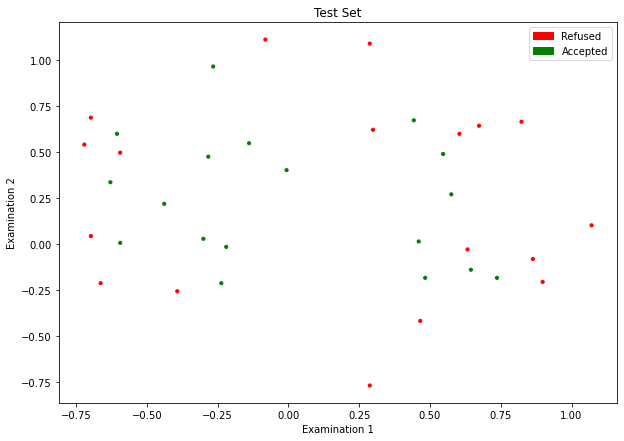

In [11]:
plt.figure(figsize=(10,7))
color = np.array(['r', 'g'])
plt.scatter(X_test_Q2['Examination 1'],
            X_test_Q2['Examination 2'],
            s = 10,
            c = color[Y_test_Q2['Class']])
plt.xlabel('Examination 1')
plt.ylabel('Examination 2')
plt.title('Test Set')
red_patch = mpatches.Patch(color='red', label='Refused')
green_patch = mpatches.Patch(color='green', label='Accepted')
plt.legend(handles=[red_patch, green_patch])
plt.show()

## ب)طبقه بندی رگرسیون لجیستیک با بردن داده ها به فضای ویژگی پیچیده تر شامل چند جمله ای های مرتبه 4 و نمایش دقت بر روی داده های آموزشی (train set) و داده های تست(test set) 

In [12]:
# Logistic regression without regularization  
poly = PolynomialFeatures(degree = 4)
X_poly_train_Q2_2 = poly.fit_transform(X_train_Q2)
X_poly_test_Q2_2 = poly.fit_transform(X_test_Q2)

model_Q2_2 = LogisticRegression(solver='saga', penalty='none', max_iter=100000)
model_Q2_2.fit(X_poly_train_Q2_2, Y_train_Q2.values.ravel())

Y_train_predict_Q2 = model_Q2_2.predict(X_poly_train_Q2_2)
print('Accuracy on train set: {:.2f}%'.format(accuracy_score(Y_train_Q2,Y_train_predict_Q2)*100))

Y_test_predict_Q2_2 = model_Q2_2.predict(X_poly_test_Q2_2)
Y_test_predict_Q2_2 = pandas.DataFrame(Y_test_predict_Q2_2, columns=['Class'], index = Y_test_Q2.index)
print('Accuracy on test  set: {:.2f}%'.format(accuracy_score(Y_test_Q2, Y_test_predict_Q2_2)*100))

Accuracy on train set: 87.80%
Accuracy on test  set: 80.56%


## ج)طبقه بندی regularized logistic regression با بردن داده ها به فضای ویژگی پیچیده تر شامل چند جمله ای های مرتبه 4 و نمایش دقت بر روی داده های آموزشی (train set) و داده های تست(test set)

In [13]:
# Logistic regression with regularization
poly = PolynomialFeatures(degree = 4)
X_poly_train_Q2_regularization = poly.fit_transform(X_train_Q2)
X_poly_test_Q2_regularization = poly.fit_transform(X_test_Q2)

model_Q2_3 = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=1, max_iter=10000)

model_Q2_3.fit(X_poly_train_Q2_regularization, Y_train_Q2.values.ravel())

Y_train_predict_Q2_regularization = model_Q2_3.predict(X_poly_train_Q2_regularization)
print('Accuracy on Train Set: {:.2f}%'.format(accuracy_score(Y_train_Q2,Y_train_predict_Q2_regularization)*100))

Y_test_predict_Q2_regularization = model_Q2_3.predict(X_poly_test_Q2_regularization)
Y_test_predict_Q2_regularization = pandas.DataFrame(Y_test_predict_Q2_regularization, columns=['Class'], index = Y_test_Q2.index)
print('Accuracy on Test  Set: {:.2f}%'.format(accuracy_score(Y_test_Q2, Y_test_predict_Q2_regularization)*100))

Accuracy on Train Set: 82.93%
Accuracy on Test  Set: 69.44%


# سؤال سوم

## الف

### خواندن فایل csv

In [14]:
# Read CSV file related to the Q3 part1
columns_names_Q3_1 = ['Feature 1','Feature 2','Class']
raw_data_Q3_1 = pandas.read_csv('Q3_1.csv', header=None, names=columns_names_Q3_1)

### طبقه بندی با روش ماشین - بردار و رسم مرز تصمیم و مقایسه برای مقادیر مختلف C

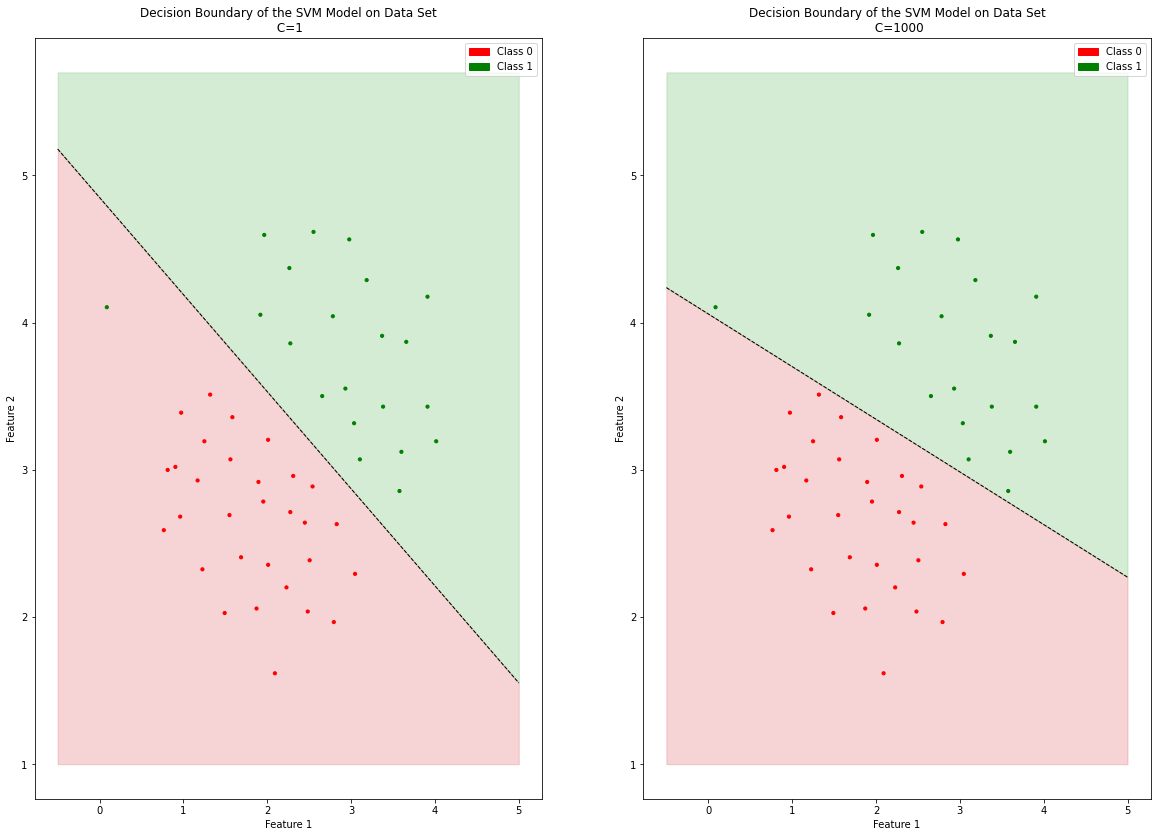

In [15]:
Y_Q3_1 = raw_data_Q3_1[['Class']]
X_Q3_1 = raw_data_Q3_1[['Feature 1','Feature 2']]

# Train first SVM model with small C parameter
model_Q3_1 = SVC(kernel='linear', C=1)
model_Q3_1.fit(X_Q3_1, Y_Q3_1.values.ravel())

# Train first SVM model with big C parameter
model_Q3_2 = SVC(kernel='linear', C=1000)
model_Q3_2.fit(X_Q3_1, Y_Q3_1.values.ravel())

# Plot the results
# Source : https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/
# Retrieve the model1 parameters.
b1 = model_Q3_1.intercept_[0]
w1_1, w1_2 = model_Q3_1.coef_.T

# Retrieve the model2 parameters.
b2 = model_Q3_2.intercept_[0]
w2_1, w2_2 = model_Q3_2.coef_.T

# Calculate the intercept and gradient of the decision boundary in model1
c1 = -b1/w1_2
m1 = -w1_1/w1_2

# Calculate the intercept and gradient of the decision boundary in model2
c2 = -b2/w2_2
m2 = -w2_1/w2_2

# Plot the data and the classification with the decision boundary
X_min_Q3_1, X_max_Q3_1 = -0.5, 5
Y_min_Q3_1, Y_max_Q3_1 = 1, 5.7
X_d_Q3_1 = np.array([X_min_Q3_1, X_max_Q3_1])
Y_d1_Q3_1 = m1*X_d_Q3_1 + c1
Y_d2_Q3_1 = m2*X_d_Q3_1 + c2

color = np.array(['r', 'g'])
plt.figure(figsize=(20, 14))

plt.subplot(121)
plt.plot(X_d_Q3_1, Y_d1_Q3_1, 'k', lw=1, ls='--')
plt.fill_between(X_d_Q3_1, Y_d1_Q3_1, Y_min_Q3_1, color='tab:red', alpha=0.2)
plt.fill_between(X_d_Q3_1, Y_d1_Q3_1, Y_max_Q3_1, color='tab:green', alpha=0.2)

plt.scatter(X_Q3_1['Feature 1'],
            X_Q3_1['Feature 2'],
            s = 10,
            c = color[Y_Q3_1['Class']])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of the SVM Model on Data Set\n C=1')
red_patch = mpatches.Patch(color='red', label='Class 0')
green_patch = mpatches.Patch(color='green', label='Class 1')
plt.legend(handles=[red_patch, green_patch])


plt.subplot(122)
plt.plot(X_d_Q3_1, Y_d2_Q3_1, 'k', lw=1, ls='--')
plt.fill_between(X_d_Q3_1, Y_d2_Q3_1, Y_min_Q3_1, color='tab:red', alpha=0.2)
plt.fill_between(X_d_Q3_1, Y_d2_Q3_1, Y_max_Q3_1, color='tab:green', alpha=0.2)

plt.scatter(X_Q3_1['Feature 1'],
            X_Q3_1['Feature 2'],
            s = 10,
            c = color[Y_Q3_1['Class']])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of the SVM Model on Data Set\n C=1000')
red_patch = mpatches.Patch(color='red', label='Class 0')
green_patch = mpatches.Patch(color='green', label='Class 1')
plt.legend(handles=[red_patch, green_patch])

plt.show()

پارامتر C به بهینه سازی SVM می گوید که تا چه حدی از طبقه بندی نادرست هر مثال آموزشی جلوگیری کنید. 
برای مقادیر بزرگ C: بهینه سازی یک صفحه بزرگ با حاشیه کوچکتر را انتخاب میکند تا آن صصفحه بزرگ کار بهتری در طبقه بندی صحیح تمام نقاط آموزشی انجام دهد. 
مقدار بسیار کوچک C: باعث میشود که بهینه ساز به دنبال یک صفحه بزرگ جداکننده با حاشیه بزرگتر باشد، حتی اگر آن صفحه بزرگ نقاط بیشتری را به اشتباه طبقه بندی کند. برای مقادیر بسیار کوچک C، بالاجبار نمونه های طبقه بندی اشتباهی دریافت می کنیم، حتی اگر داده های آموزشی ما به طور خطی قابل تفکیک باشند.

## ب

### خواندن فایل csv

In [16]:
# Read CSV file related to the Q3 part 2
columns_names_Q3_2 = ['Feature 1','Feature 2','Class']
raw_data_Q3_2 = pandas.read_csv('Q3_2.csv', header=None, names=columns_names_Q3_2)

### طبقه بندی با روش کرنل های گوسی و رسم مرز تصمیم

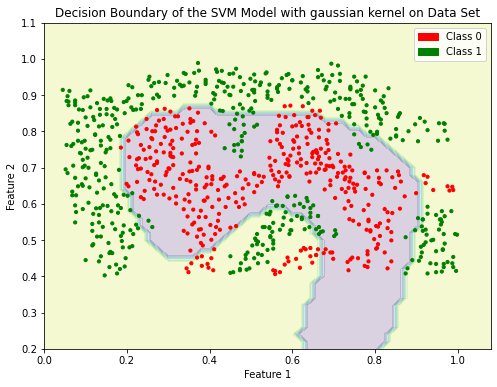

In [17]:
X = raw_data_Q3_2[['Feature 1','Feature 2']]
Y = raw_data_Q3_2[['Class']]


# Train first SVM Model
model_Q3_2 = SVC(kernel='rbf') # gamma='scale' as default
model_Q3_2.fit(X, Y.values.ravel())

# Plot the data and the classification with the decision boundary.
color = np.array(['r', 'g'])

# plot the decision surface
plt.figure(figsize=(8, 6))

X_min_Q3_2, X_max_Q3_2 = 0, 1.1
Y_min_Q3_2, Y_max_Q3_2 = 0.2, 1.1
X_d_Q3_2, Y_d_Q3_2 = np.meshgrid(np.arange(X_min_Q3_2, X_max_Q3_2, 0.02),
                     np.arange(Y_min_Q3_2, Y_max_Q3_2, 0.02))

boundary_decision_Q3_2 = model_Q3_2.predict(np.array([X_d_Q3_2.ravel(), Y_d_Q3_2.ravel()]).T)
boundary_decision_Q3_2 = boundary_decision_Q3_2.reshape(X_d_Q3_2.shape)
plt.contourf(X_d_Q3_2, Y_d_Q3_2, boundary_decision_Q3_2, alpha=0.2)

plt.scatter(X['Feature 1'],
            X['Feature 2'],
            s = 10,
            c = color[Y['Class']])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of the SVM Model with gaussian kernel on Data Set')
red_patch = mpatches.Patch(color='red', label='Class 0')
green_patch = mpatches.Patch(color='green', label='Class 1')
plt.legend(handles=[red_patch, green_patch])

plt.show()

## ج

### خواندن فایل csv

In [18]:
# Read CSV file related to the Q3 part 2
columns_names_Q3_3 = ['Feature 1','Feature 2','Class']
raw_data_Q3_3 = pandas.read_csv('Q3_3.csv', header=None, names=columns_names_Q3_3)

### دسته بندی به دو دسته train و test  

In [19]:
X_Q3_3 = raw_data_Q3_3[['Feature 1','Feature 2']]
Y_Q3_3 = raw_data_Q3_3[['Class']]

X_train_Q3_3, X_test_Q3_3, Y_train_Q3_3, Y_test_Q3_3 = train_test_split(X_Q3_3, Y_Q3_3, test_size = 0.30)

### طبقه بندی با روش ماشین - بردار و رسم بهترین مرز تصمیم با استفاده از تغییر پارامترها 

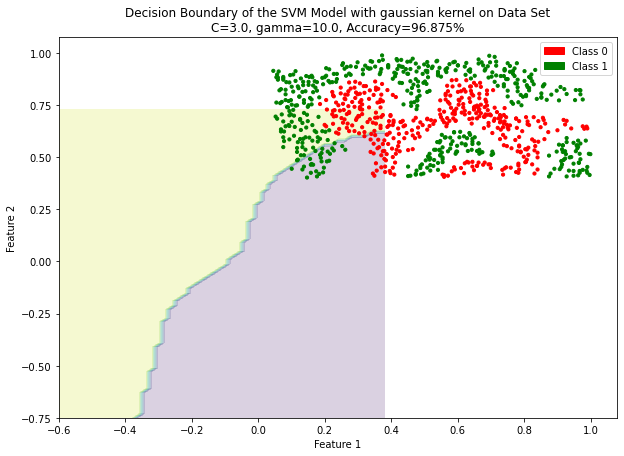

In [20]:
accuracy = {}
for C in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]:
    for gamma in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]:
        # Train first SVM Model
        model_Q3_3 = SVC(kernel='rbf', C=C, gamma=gamma)
        model_Q3_3.fit(X_train_Q3_3, Y_train_Q3_3.values.ravel())

        Y_test_predict_Q3_3 = model_Q3_3.predict(X_test_Q3_3)
        Y_test_predict_Q3_3 = pandas.DataFrame(Y_test_predict_Q3_3, columns=['Class'], index = Y_test_Q3_3.index)
        accuracy['{},{}'.format(C, gamma)] = accuracy_score(Y_test_Q3_3, Y_test_predict_Q3_3)*100

C_best, gamma_best = (max(accuracy, key = accuracy.get)).split(',', 1) 
C_best, gamma_best = float(C_best), float(gamma_best)
accuracy_best = max(accuracy.values())

# Train the Best Possible Model
model_Q3_3 = SVC(kernel='rbf', C=C_best, gamma=gamma_best)
model_Q3_3.fit(X_train_Q3_3, Y_train_Q3_3.values.ravel())

# Plot the data and the classification with the decision boundary.
color = np.array(['r', 'g'])

# plot the decision surface
plt.figure(figsize=(10, 7))

X_min_Q3_3, X_max_Q3_3 = -0.6, 0.4
Y_min_Q3_3, Y_max_Q3_3 = -0.75, 0.75
X_d_Q3_3, Y_d_Q3_3 = np.meshgrid(np.arange(X_min_Q3_3, X_max_Q3_3, 0.02),
                     np.arange(Y_min_Q3_3, Y_max_Q3_3, 0.02))

boundary_decision = model_Q3_3.predict(np.array([X_d_Q3_3.ravel(), Y_d_Q3_3.ravel()]).T)
boundary_decision = boundary_decision.reshape(X_d_Q3_3.shape)
plt.contourf(X_d_Q3_3, Y_d_Q3_3, boundary_decision, alpha=0.2)

plt.scatter(X['Feature 1'],
            X['Feature 2'],
            s = 10,
            c = color[Y['Class']])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of the SVM Model with gaussian kernel on Data Set\nC={}, gamma={}, Accuracy={}%'
          .format(C_best, gamma_best, accuracy_best))
red_patch = mpatches.Patch(color='red', label='Class 0')
green_patch = mpatches.Patch(color='green', label='Class 1')
plt.legend(handles=[red_patch, green_patch])

plt.show()

# سؤال چهارم

## خواندن فایل csv

In [21]:
# Read CSV file related to the Q3 part1
raw_data_Q4 = pandas.read_csv('Q4.csv')

## الف)دسته بندی به دو دسته train و test  

In [22]:
X_Q4 = raw_data_Q4[['sepal.length','sepal.width','petal.length','petal.width']]
Y_Q4 = raw_data_Q4[['variety']]

X_train_Q4, X_test_Q4, Y_train_Q4, Y_test_Q4 = train_test_split(X_Q4, Y_Q4, test_size = 0.3)

## ب)

In [23]:
model_Q4 = KNeighborsClassifier(n_neighbors=6)
model_Q4.fit(X_train_Q4, Y_train_Q4.values.ravel())
Y_predict_Q4 = model_Q4.predict(X_test_Q4)
print('Accuracy on test set: {:.2f}%'.format(accuracy_score(Y_test_Q4, Y_predict_Q4)*100))

Accuracy on test set: 93.33%


## ج)

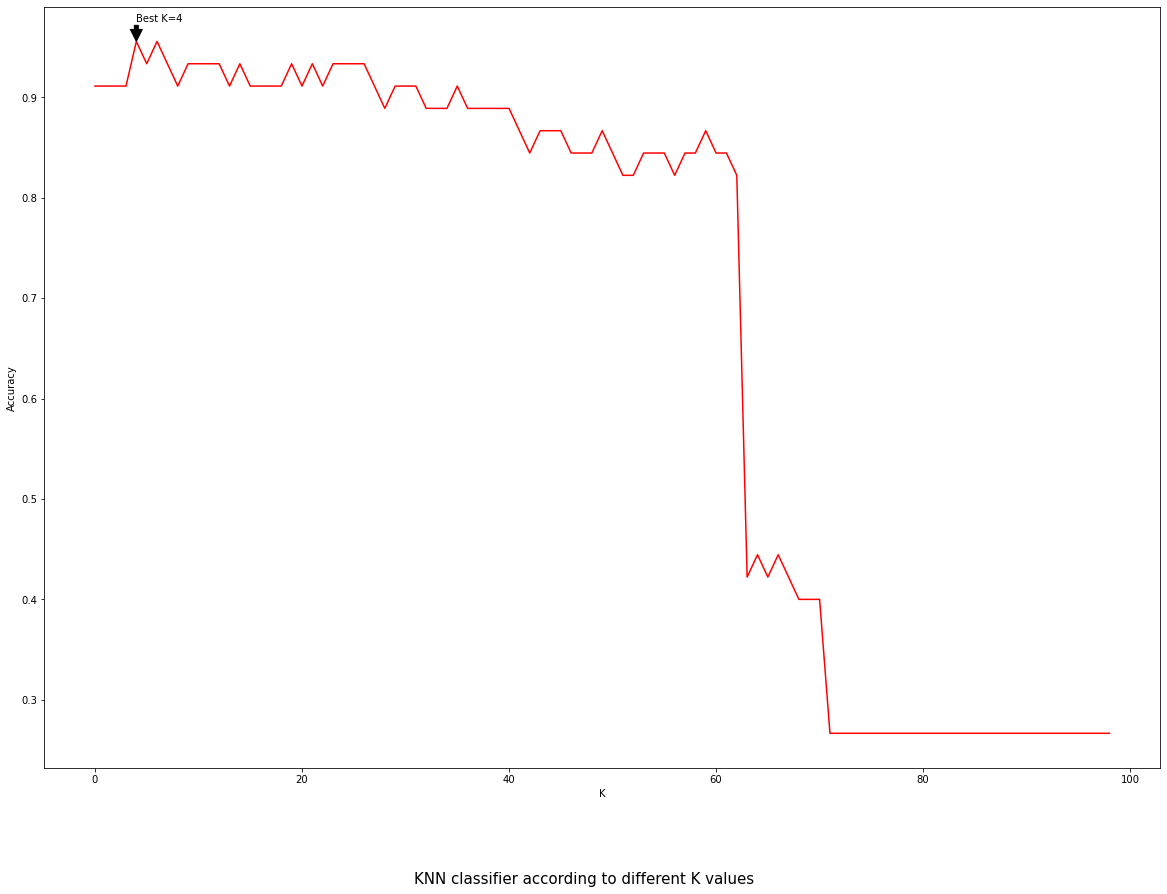

In [24]:
accuracy = []
for K in range(1, 100):
    model_Q4 = KNeighborsClassifier(n_neighbors=K)
    model_Q4.fit(X_train_Q4, Y_train_Q4.values.ravel())
    Y_predict_Q4 = model_Q4.predict(X_test_Q4)
    accuracy.append(accuracy_score(Y_test_Q4,Y_predict_Q4))
    
plt.figure(figsize=(20,14))
plt.plot(range(0, 99), accuracy, c='r')

accuracy_max = max(accuracy)
k_max = accuracy.index(accuracy_max)

plt.annotate('Best K={}'.format(k_max), xy=(k_max, accuracy_max), xytext=(k_max, accuracy_max+0.02),
            arrowprops=dict(facecolor='black', shrink=0.00005))

plt.xlabel("K")
plt.figtext(0.5, 0.01, "KNN classifier according to different K values",
            wrap=True, horizontalalignment='center', fontsize=15)
plt.ylabel("Accuracy")
plt.show()